In [27]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import exp,sqrt
A = 0.23
B=2.5
density_0=1.76
V_00 = 1/density_0
C=0.7
Ph=0.0007
kphi=3150
G=1.22
Q=0.0571
Z=-0.8066

In [28]:
def rate(phi,phi_0,P):
    t=phi_0*(1-phi)
    b=phi*(1-phi_0)
    return kphi * (P-Ph*(1-sqrt(t/b)))

In [49]:
def EoS(V,E):
    y=1-V/V_00
    x=4*B*y
    Pi= (density_0*A*A/(4*B)) * (exp(x)-1) if y<=0 else (density_0*A*A/(4*B)) * (x + x*x/2+x*x*x/6+C*x*x*x*x/24 + y*y * V_00*V_00*V_00*V_00/(V*V*V*V))
    Ei = (A*A/(16*B*B)) * (exp(x)-1) + density_0 * A*A * (V-V_00)/(4*B) + Q if y<=0 else (A*A/(16*B*B)) * (x*x/2+x*x*x/6+x*x*x*x/24+C*x*x*x*x*x/120) + A*A*y*y*y*V_00*V_00*V_00/(12*B*V*V*V) + Q
    Gamma = G+Z*y if y<=0 else G

    return Pi + (E-Ei)*Gamma/V

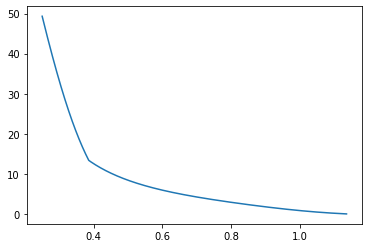

In [72]:
dt=0.0000005
dV=0.0001

E=0.0571
phi_0=0.5
phi=0.5
nV=V_00/phi_0
P=0.01
Ps=[]
Vs=[]
while nV>0.25:
    r=rate(phi,phi_0,P)
    phi=min(1,phi+r*dt)
    oV=nV
    nV-=dV
    #E-=P*(nV-oV)
    P=phi*EoS(phi*nV,E)
    Ps.append(100*P)
    Vs.append(nV)

d={'V': Vs, 'P': Ps}

df=pd.DataFrame(data=d)
df=df[df.index % 100 == 0]
df.to_csv('compaction.txt', sep='\t',index=False)
plt.plot(Vs,Ps)
